Overview:



 Describe the problem you are trying to solve:

 The problem, I am trying to resolve in my analysis is the type of college an incoming student is to attend, private or public? To make this decsion, I will utilze 17 predictor variables from the "College" data set (listed below) to classify my response variable ("Private") i.e. decide whether a public or private college is better for a prticular student to attend. The machine algorithms I will be utilizing to resolve this problem are: KNN and K-means clustering. The KNN (K-Nearest Neighbour) algorithm is a non-parametric supervised learning classifier. It is used to make classifications about the group of an individual point. K-means clustering is an unsupervised machine learning algorithm which is used to group an unlabeled dataset into different predefined clusters (K). For our use case, these algorithms fit perfectly as we need to classify whether a student should go to private (one class) or public (second class) college based on observations (data points), from each of the 17 predictor variables.


Below are the feature definitions of the "College" data set:

1). College: Name of the College <br> 
2). Private: A "Yes" or "No" flag stating whether college is private or not<br>
3). Apps: The number of college applicants<br>
4). Accept: The number of accepted college applicants<br>
5). Enroll: The number of enrolled college applicants<br>
6). Top10perc Pct: The top 10% of highschool senior applicants<br>
7). Top25perc: The top 25% of highschool senior applicants<br>
8). F.Undergrad: The number of fulltime undergraduate students<br>
9). P.Undergrad: The number of parttime undergraduate students<br>
10).Outstate:  The tuition for out of state students<br>
11).Room.Board: The room and board costs<br>
12).Books: The book costs<br>
13).Personal: Student personal spending<br>
14).PhD: The percentage of college faculty who hold a PHD<br>
15).Terminal: The percentage of college faculty who hold the highest degree in their area of study<br>
16).S.F.Ratio: Student to faculty ratio<br>
17).perc.alumni: The percentage of alumni who donate money<br>
18).Expend: College expenditures related to Students<br>
19).Grad.Rate: College student graduation rate<br>

The College data set has been taken from Kaggle: https://www.kaggle.com/code/shubhamchaurasia/notebooka51279360f/input <br>

Video Presentation link: https://www.youtube.com/watch?v=WI7IhPgobOU



1). Exploratory Data Analysis:



                            College Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


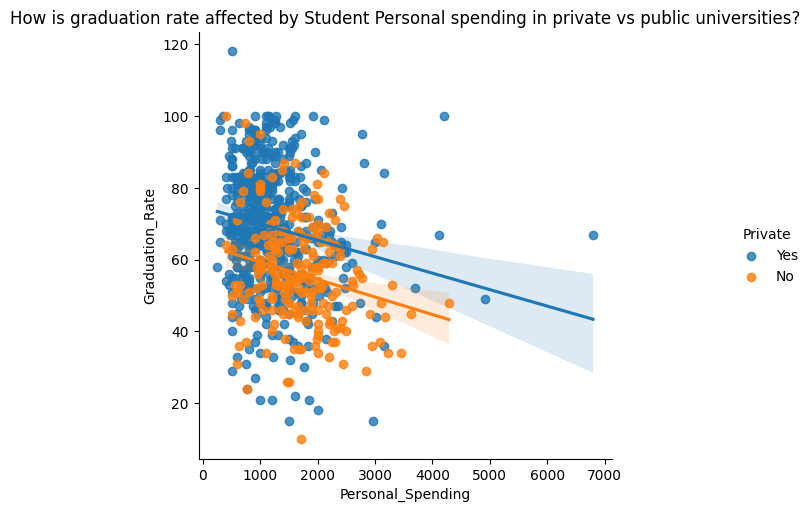

c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


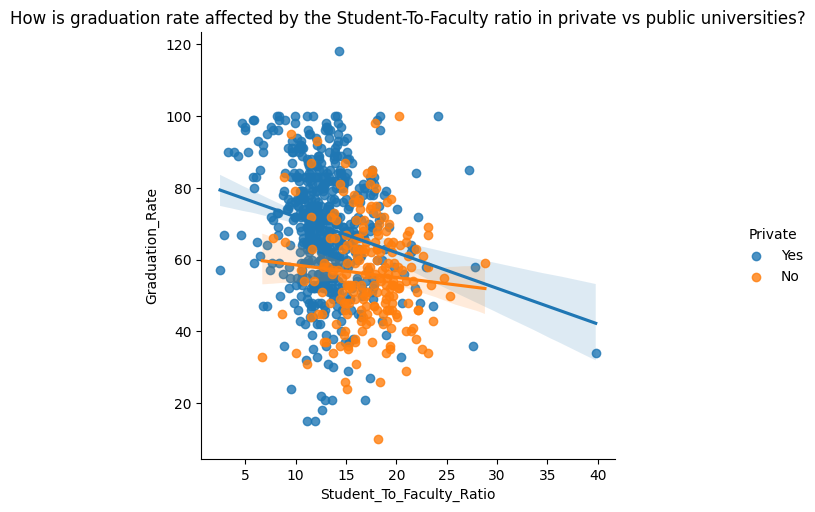

c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


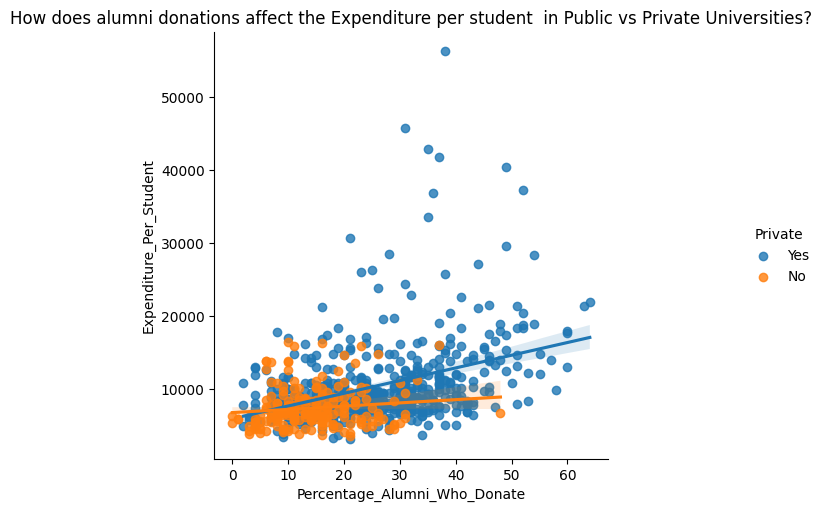

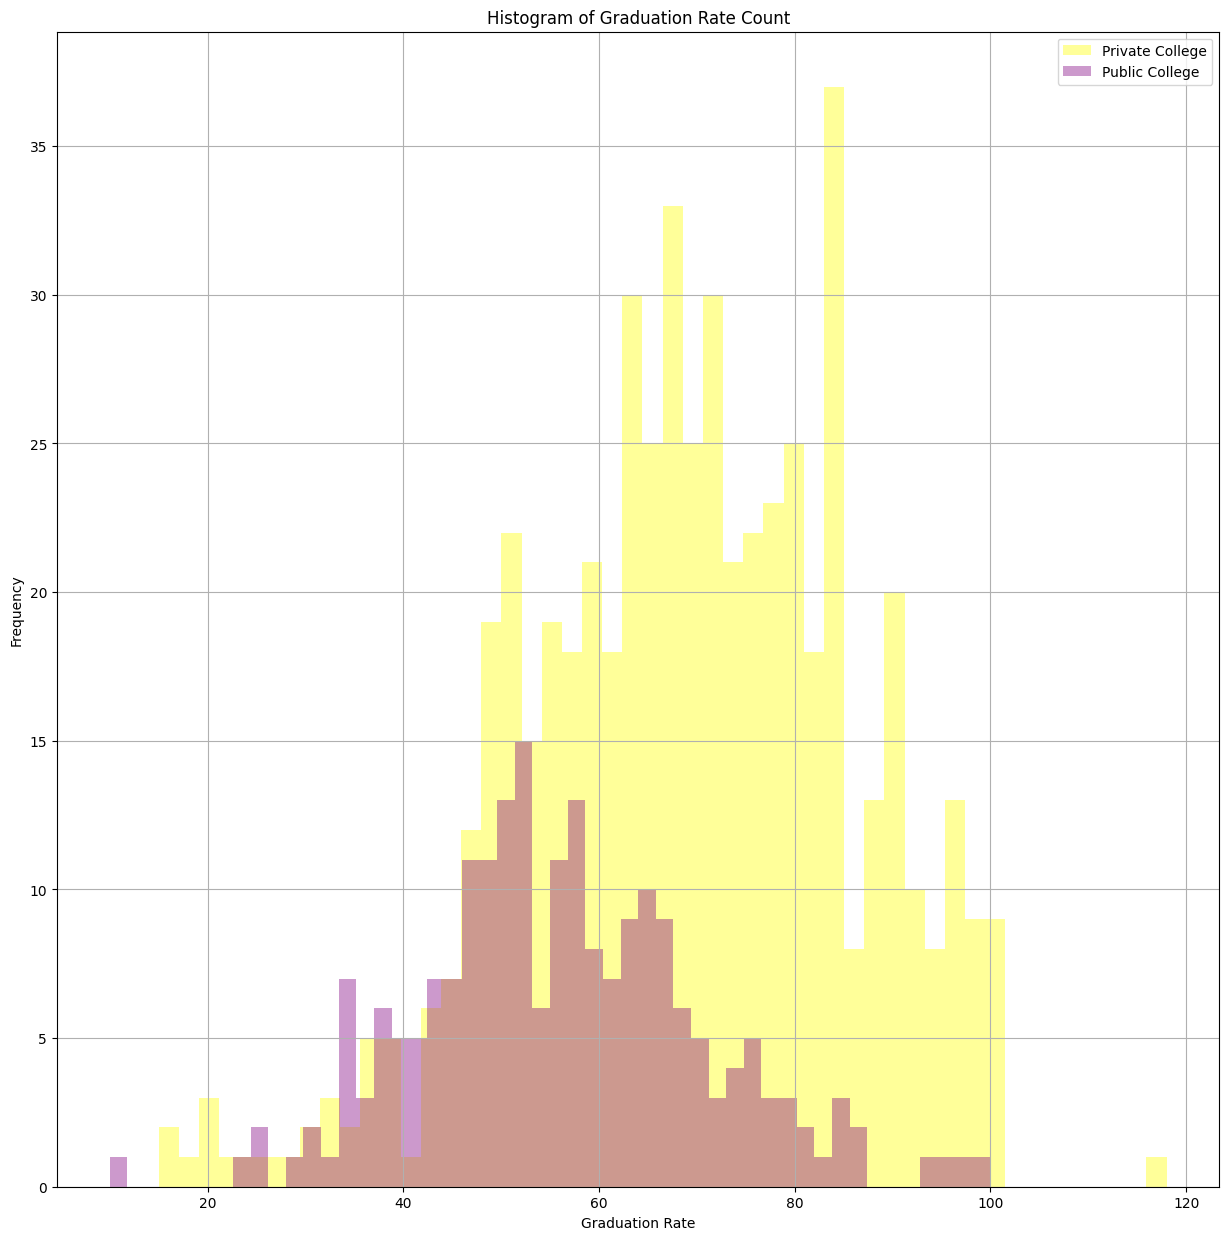

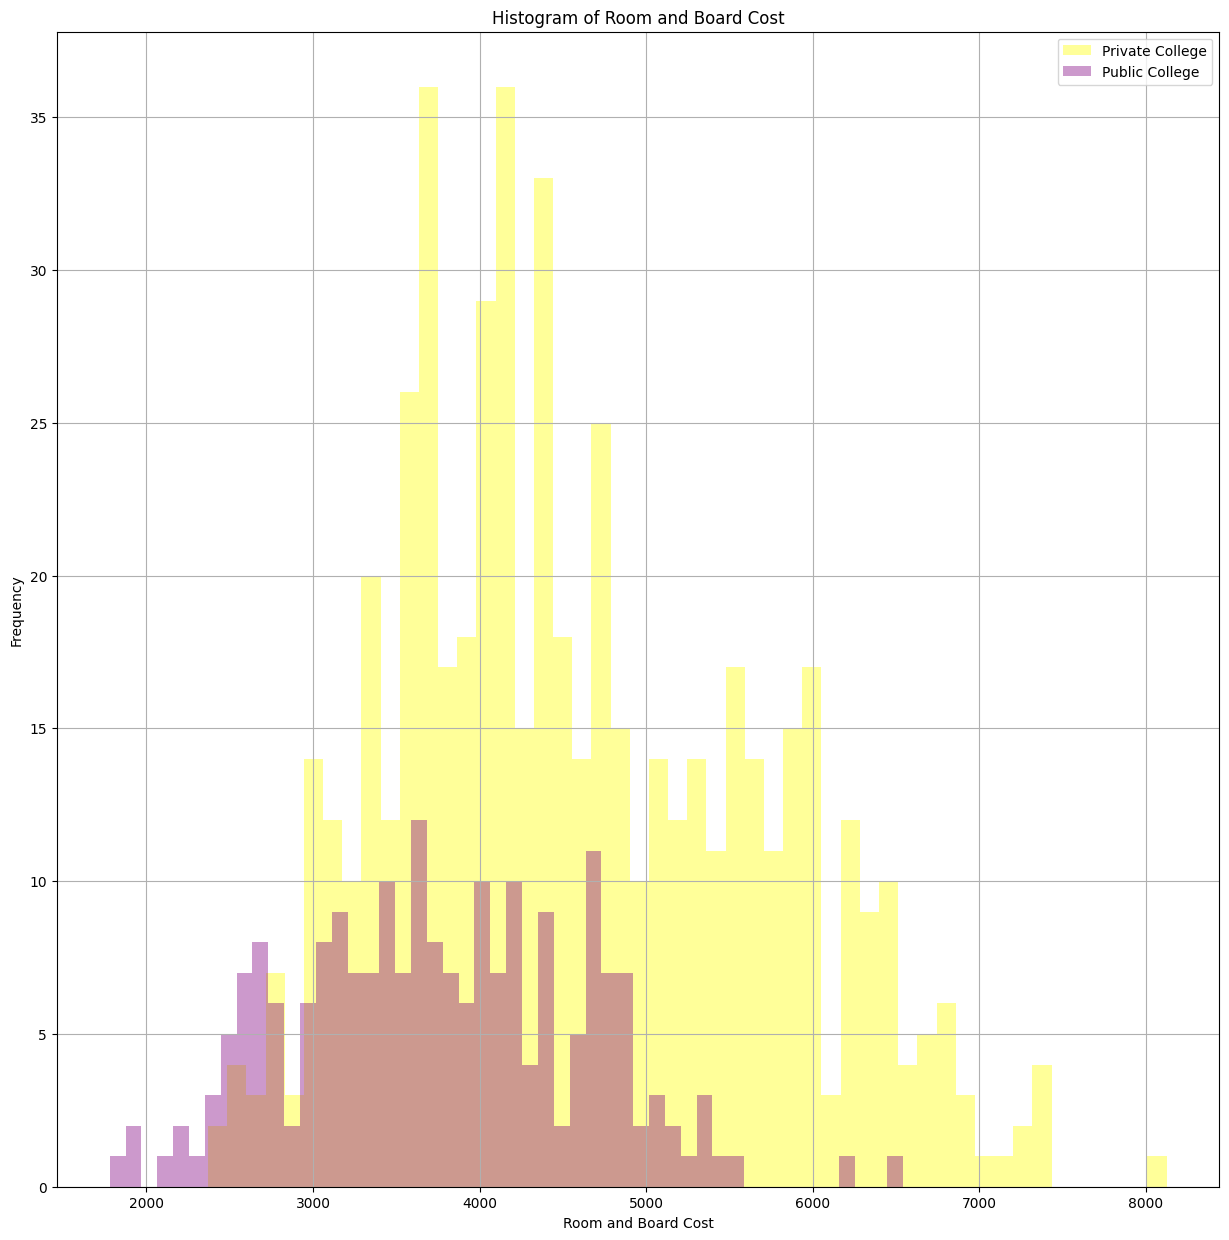

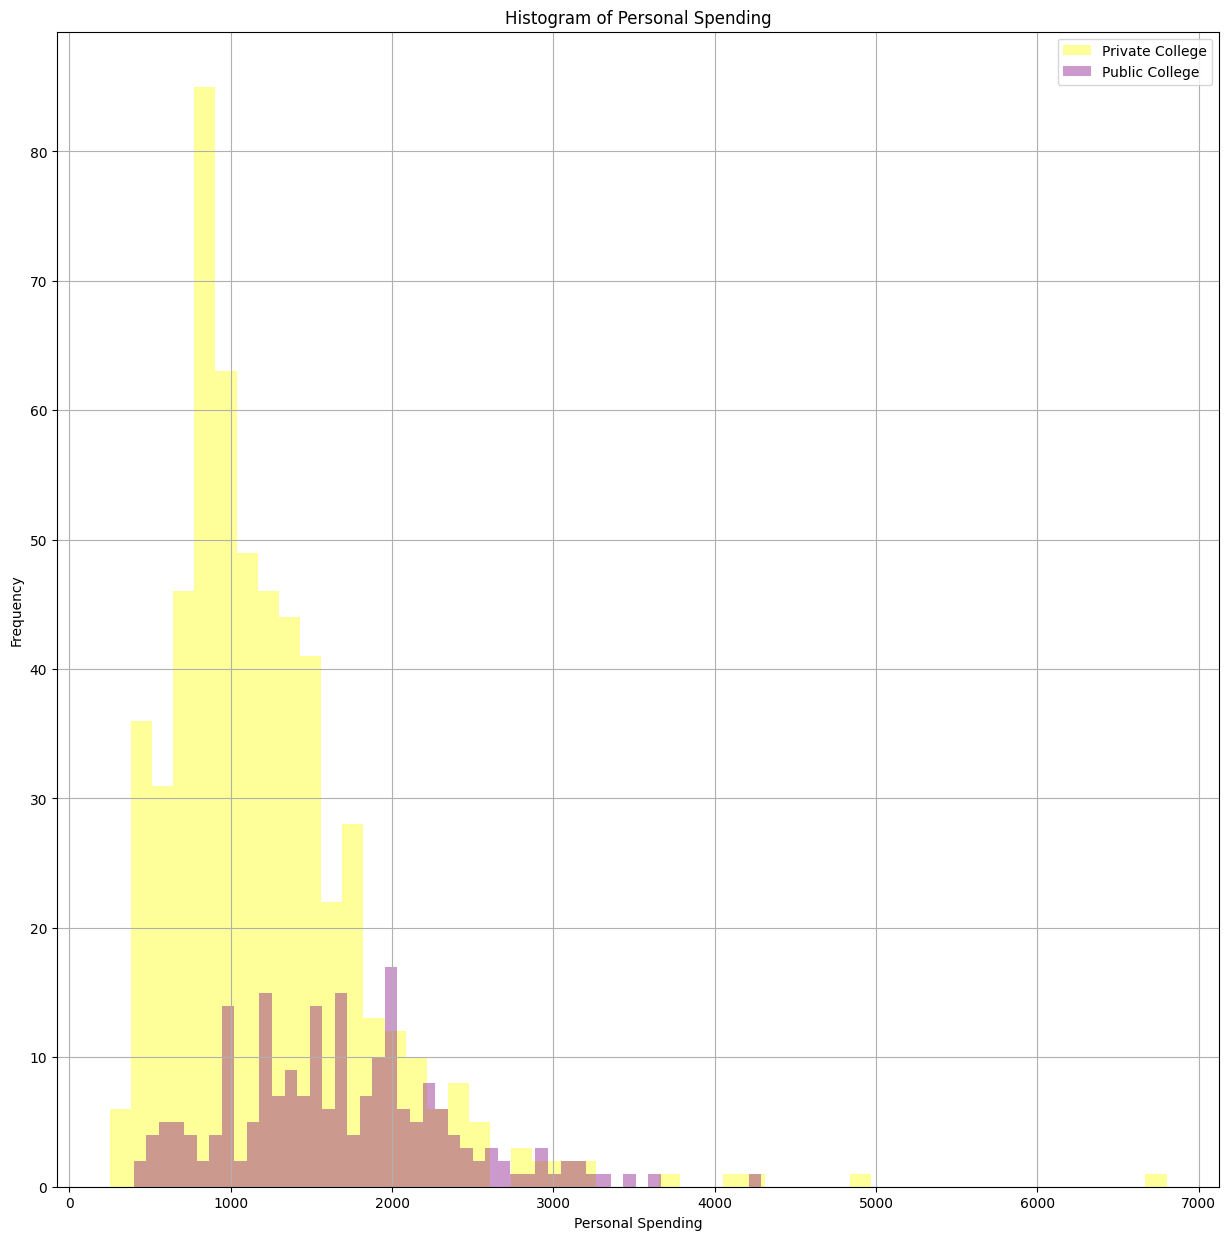

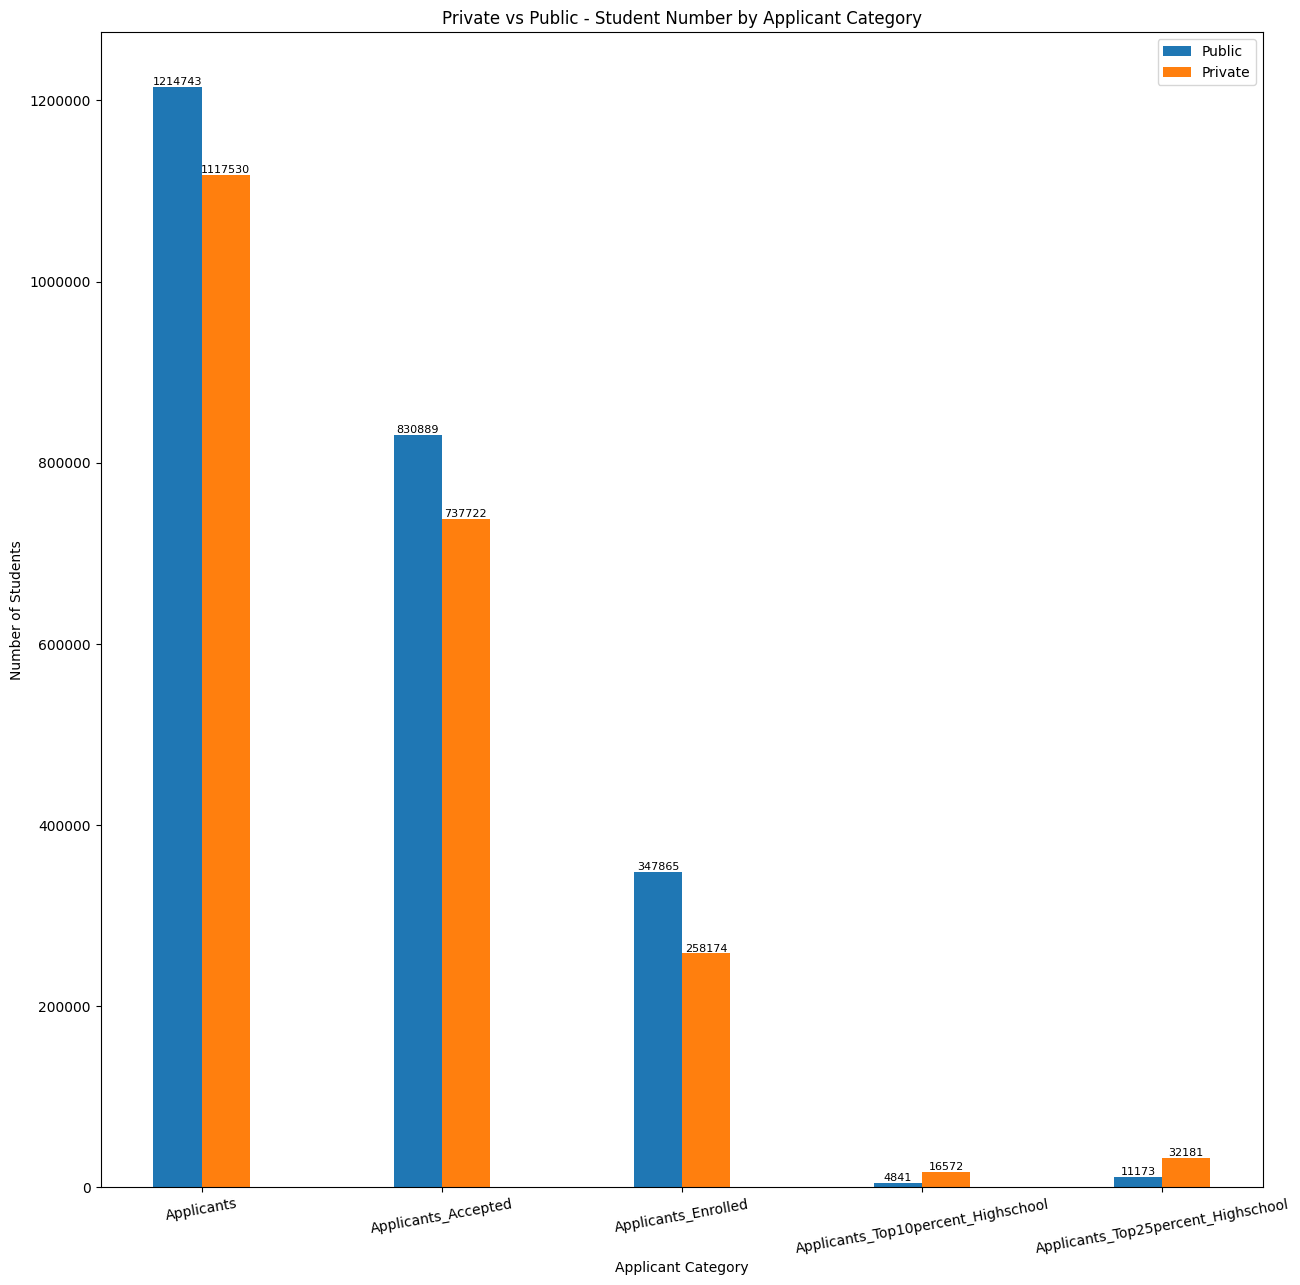

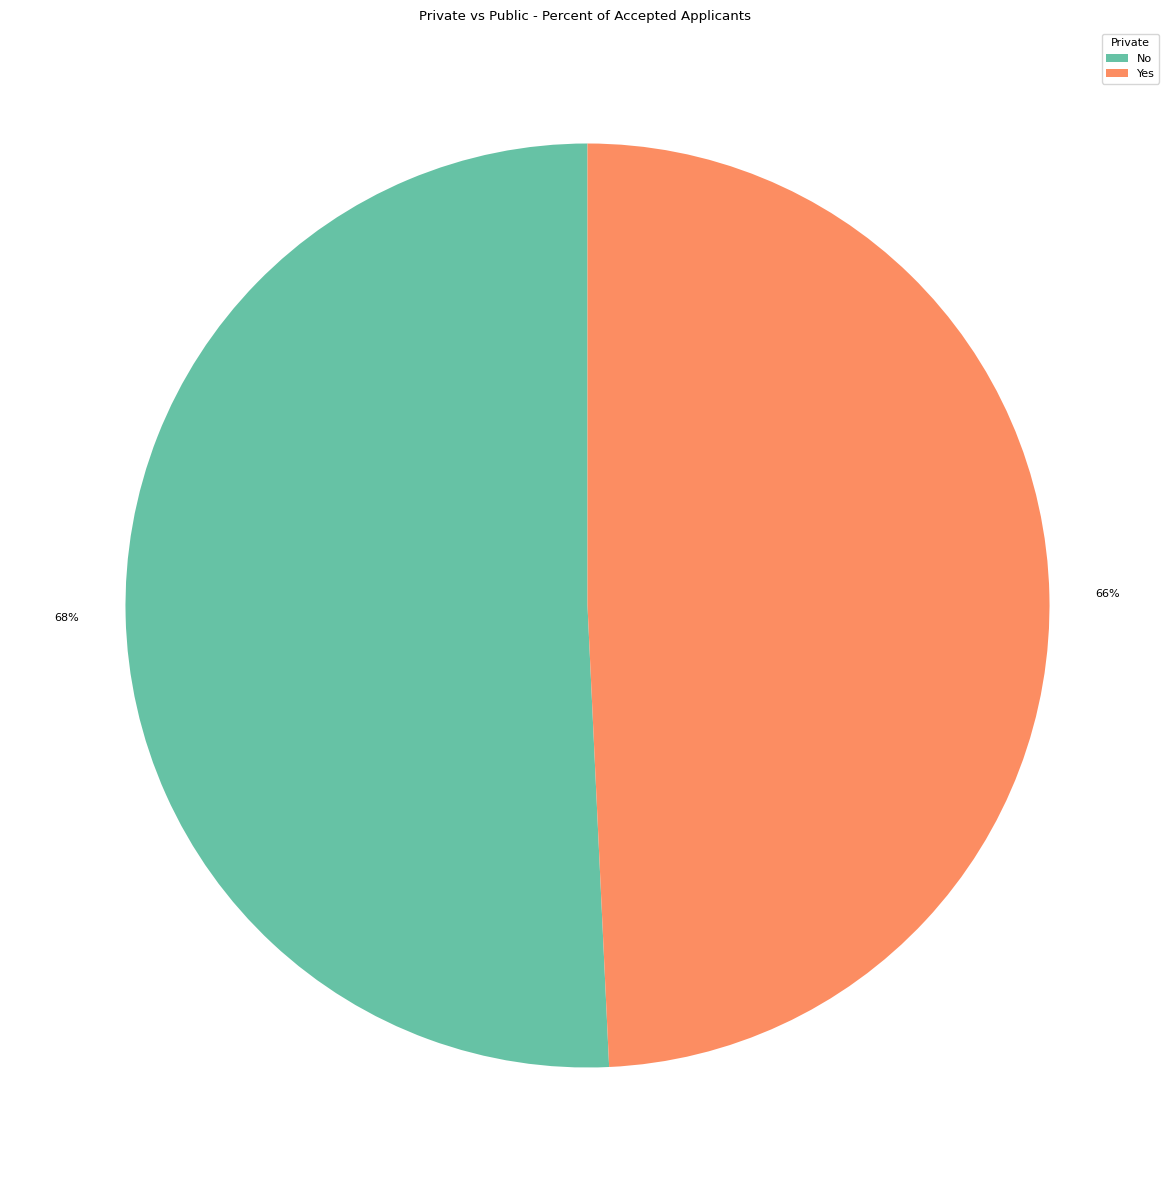

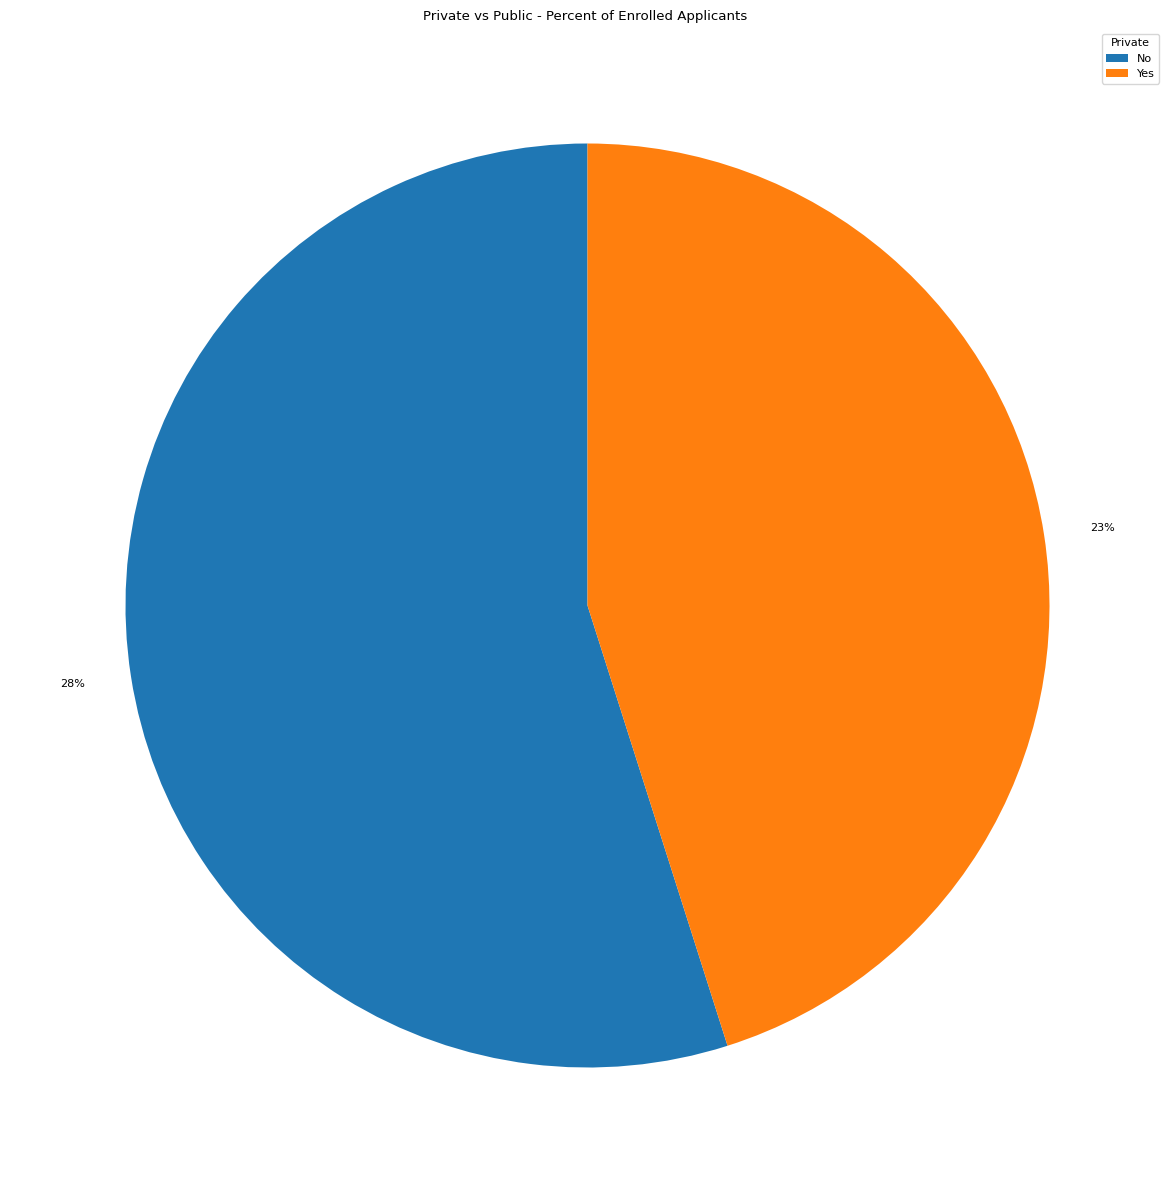

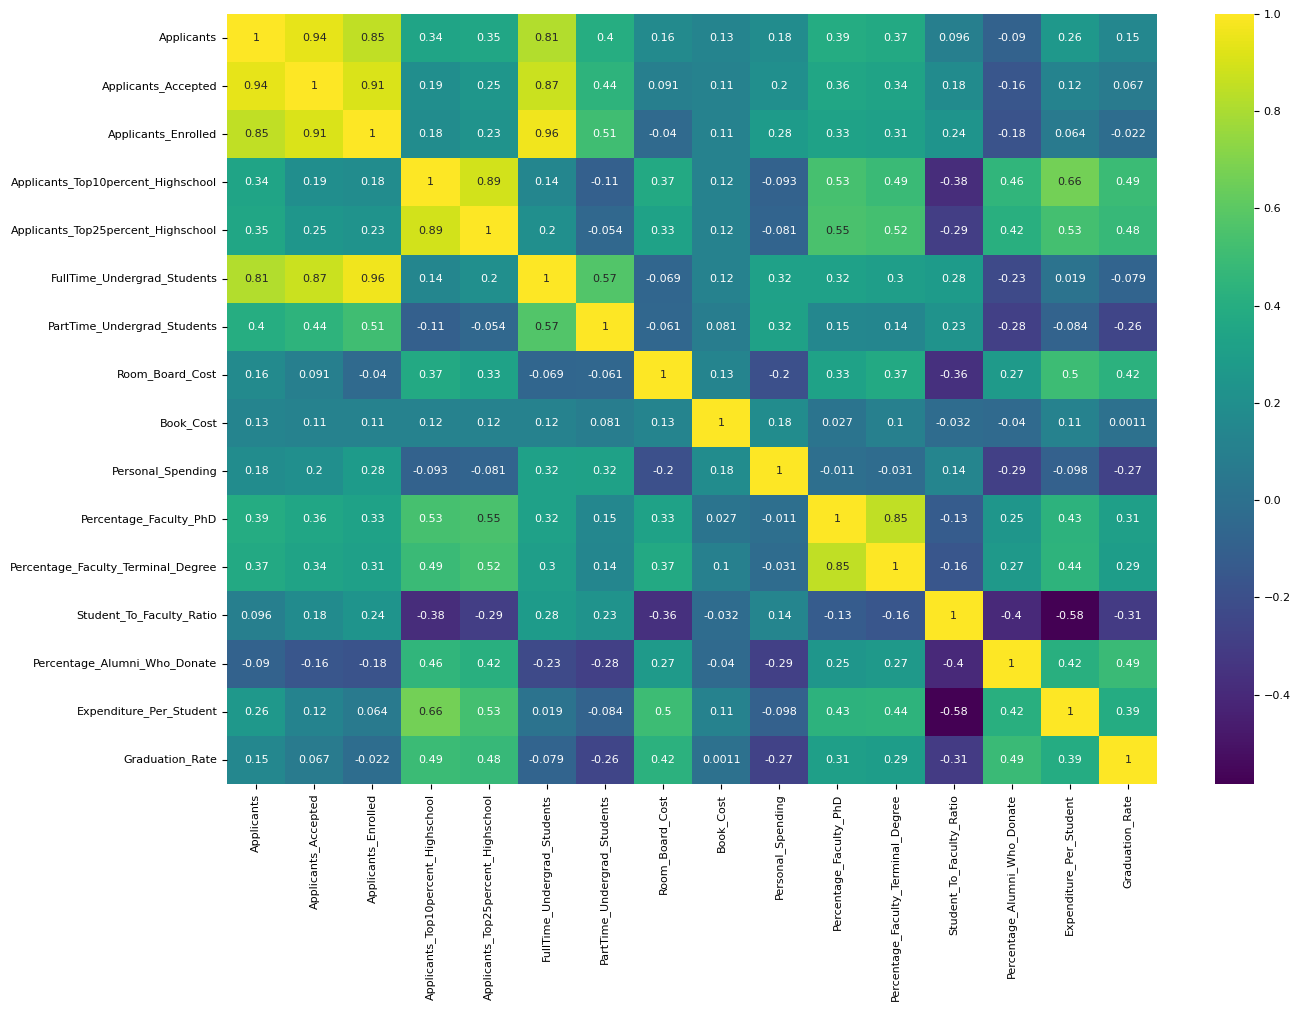

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from numpy import nan
from numpy import isnan

#Adjusting all plot sizes 
plt.rcParams['figure.figsize'] = [15, 15]

#Load the "college data" data set from GitHub
college_data = pd.read_csv("https://raw.githubusercontent.com/Data-Vlad/Data-Science/main/Data%20622%20-%20Machine%20Learning%20and%20Big%20Data/Project%20%23%204/College_Data.csv")

#Print the first 10 records of each data set
print(college_data)

#Drop columns which are not needed for our analysis
college_data.drop(['College'],axis=1,inplace=True)

#Rename columns for clarity
college_data.rename(columns = {
'Apps':'Applicants', 
'Accept':'Applicants_Accepted', 
'Enroll':'Applicants_Enrolled',
'Top10perc':'Applicants_Top10percent_Highschool',
'Top25perc':'Applicants_Top25percent_Highschool',
'F.Undergrad':'FullTime_Undergrad_Students',
'P.Undergrad': 'PartTime_Undergrad_Students',
'Outstate:': 'Out_State_Tuition',
'Room.Board':'Room_Board_Cost',
'Books': 'Book_Cost',
'Personal': 'Personal_Spending',
'PhD': 'Percentage_Faculty_PhD',
'Terminal': 'Percentage_Faculty_Terminal_Degree',
'S.F.Ratio': 'Student_To_Faculty_Ratio',
'perc.alumni': 'Percentage_Alumni_Who_Donate',
'Expend': 'Expenditure_Per_Student',
'Grad.Rate': 'Graduation_Rate',}, inplace = True) 

#identify the columns with missing values
null_series =college_data.isnull().sum()
print('Number of columns with null values\n', null_series[null_series > 0].sort_values(ascending=False))

#print the shape of the data
print("College Data Shape: ",college_data.shape)

#print the summary statistics for the data set
print(college_data.describe())

#create regression plots to identify the relationships between various numeric features pertinent to this analysis
sea.lmplot(x='Personal_Spending', y='Graduation_Rate',data=college_data,hue='Private')
plt.title('How is graduation rate affected by Student Personal spending in private vs public universities?')
plt.show()
sea.lmplot(x='Student_To_Faculty_Ratio', y='Graduation_Rate',data=college_data,hue='Private')
plt.title('How is graduation rate affected by the Student-To-Faculty ratio in private vs public universities?')
plt.show()
sea.lmplot(x='Percentage_Alumni_Who_Donate', y='Expenditure_Per_Student',data=college_data,hue='Private')
plt.title('How does alumni donations affect the Expenditure per student  in Public vs Private Universities?')
plt.show()


#create histograms to identify the frequency distributions of the various numeric features pertinent to this analysis

#Graduation Rate
college_data[college_data["Private"] == "Yes"]["Graduation_Rate"].hist(color="yellow",bins=50,label="Private College",alpha=0.4)
college_data[college_data["Private"] == "No"]["Graduation_Rate"].hist(color="purple",bins=50,label="Public College",alpha=0.4)
plt.legend()
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.title("Histogram of Graduation Rate Count")
plt.show()
#Room and Board Cost
college_data[college_data["Private"] == "Yes"]["Room_Board_Cost"].hist(color="yellow",bins=50,label="Private College",alpha=0.4)
college_data[college_data["Private"] == "No"]["Room_Board_Cost"].hist(color="purple",bins=50,label="Public College",alpha=0.4)
plt.legend()
plt.xlabel('Room and Board Cost')
plt.ylabel('Frequency')
plt.title("Histogram of Room and Board Cost")
plt.show()
#Personal Spending
college_data[college_data["Private"] == "Yes"]["Personal_Spending"].hist(color="yellow",bins=50,label="Private College",alpha=0.4)
college_data[college_data["Private"] == "No"]["Personal_Spending"].hist(color="purple",bins=50,label="Public College",alpha=0.4)
plt.legend()
plt.xlabel('Personal Spending')
plt.ylabel('Frequency')
plt.title("Histogram of Personal Spending")
plt.show()

#Grouped Bar Plot
#Retrieve fields needed for student application statistics
college_data_group = college_data[['Private','Applicants','Applicants_Top10percent_Highschool','Applicants_Top25percent_Highschool','Applicants_Accepted','Applicants_Enrolled']].copy()
#pivot the columns which will need to be aggregated
melted_college_data_group = college_data_group.melt(id_vars=['Private'], var_name='Incoming_College_Freshmen', value_name='Number_of_Incoming_College_Freshmen')
#aggregate the data
melted_college_data_group = melted_college_data_group.groupby(['Incoming_College_Freshmen', 'Private']).agg(Number_of_Incoming_College_Freshmen=("Number_of_Incoming_College_Freshmen", 'sum')) 
#Define the data for the plot
melted_college_data_dict = {
 'Public':[ 1214743,830889,347865,4841,11173],
 'Private':[1117530,737722,258174,16572,32181] 
}
#define the x-axis labels and the width of each bar
labels = ['Applicants', 'Applicants_Accepted', 'Applicants_Enrolled', 'Applicants_Top10percent_Highschool', 'Applicants_Top25percent_Highschool']
bar_width = 0.2
x_pos = np.arange(len(labels))
# Create a figure and axis object
fig, ax = plt.subplots()
# Loop through each group of bars and create a set of bars for each group
for i, (group, values) in enumerate(melted_college_data_dict.items()):
   pos = x_pos + (i * bar_width)
   ax.bar(pos, values, width=bar_width, label=group)
   # Set the x-axis labels and tick positions
ax.set_xticks(x_pos + ((len(melted_college_data_dict) - 1) / 2) * bar_width)
ax.set_xticklabels(labels)
# Add a legend to the plot
ax.legend()
# Add axis labels and a title to the plot
ax.set_xlabel('Applicant Category')
ax.set_ylabel('Number of Students')
ax.set_title('Private vs Public - Student Number by Applicant Category')
plt.xticks(rotation=10)
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
font = {'size': 8}
# using rc function
plt.rc('font', **font)
#annotate bars in barplot
for container in ax.containers:
    ax.bar_label(container, fmt = '%d')
# Show the plot
plt.show()


#pie charts
college_data_pie = college_data[['Private','Applicants','Applicants_Accepted','Applicants_Enrolled']].copy()
#aggregate the data
college_data_pie = college_data_pie.groupby(['Private']).agg({'Applicants':'sum','Applicants_Accepted':'sum','Applicants_Enrolled':'sum'})
#Preparing data for plotting
college_data_pie.insert(3,"Applicants_Acceptance_pct",college_data_pie['Applicants_Accepted']/college_data_pie['Applicants']*100)
college_data_pie.insert(4,"Applicants_Enrolled_pct",college_data_pie['Applicants_Enrolled']/college_data_pie['Applicants']*100)
college_data_pie= college_data_pie[['Applicants_Acceptance_pct','Applicants_Enrolled_pct']].copy()
data_dict = college_data_pie.to_dict() 
df = pd.DataFrame(data_dict)
df = df.astype({"Applicants_Acceptance_pct": int})
df = df.astype({"Applicants_Enrolled_pct": int})
df.insert(2,"Applicant_Accp_lbl",df['Applicants_Acceptance_pct'].astype(str) + "%")
df.insert(3,"Applicant_Enroll_lbl",df['Applicants_Enrolled_pct'].astype(str) + "%")
#plotting Percent of Accepted Applicants pie chart
plt.pie(df['Applicants_Acceptance_pct'].values, labels=df["Applicant_Accp_lbl"].values, startangle=90, colors=plt.cm.Set2.colors)
plt.title("Private vs Public - Percent of Accepted Applicants ")
plt.legend(df['Applicants_Acceptance_pct'].keys()).set_title('Private')
plt.show()
#plotting Percent of Enrolled Applicants pie chart
plt.pie(df['Applicants_Enrolled_pct'].values, labels=df["Applicant_Enroll_lbl"].values, startangle=90, colors=["#1f77b4", "#ff7f0e"])
plt.title("Private vs Public - Percent of Enrolled Applicants ")
plt.legend(df['Applicants_Enrolled_pct'].keys()).set_title('Private')
plt.show()



#Create a heatmap to visualize the correlations of all the variables in the data set
college_data_heatmap = college_data[['Applicants','Applicants_Accepted','Applicants_Enrolled','Applicants_Top10percent_Highschool','Applicants_Top25percent_Highschool','FullTime_Undergrad_Students','PartTime_Undergrad_Students','Room_Board_Cost','Book_Cost','Personal_Spending','Percentage_Faculty_PhD','Percentage_Faculty_Terminal_Degree','Student_To_Faculty_Ratio','Percentage_Alumni_Who_Donate','Expenditure_Per_Student','Graduation_Rate']].copy()
plt.figure(figsize=(15,10))
sea.heatmap(college_data_heatmap .corr(),cmap="viridis",annot=True,linewidths=0, linecolor='white',cbar=True)
plt.show()


                                                              REGRESSION PLOTS 

<u>Graduation Rate vs Personal Spending:</u>

 **Purpose of Analysis:** <br> 
 In the regression plot generated above, I identify the relationship between a students' graduation rate and their personal spending. I felt this was important to conduct this analysis because the more money a student spends the more they need to earn, thus, they need to hold some sort of job while at school. This in 
 consequence can take time away from their studies and prevent them from graduating on time.

 **Conclusion of Analysis:**<br> 
 The analysis displays, especially higher correlation for public colleges that the lower the graduation rate, the higher the personal spending.  Thus, it looks to hold true that students who have higher personal spending are in fact holding down a job which takes time from their studying and thus minimizes graduation rates on aveage. This holds true for both public and private, even though private have higher graduation rates as compared to public colleges.

<u>Graduation Rate vs Student_To_Faculty_Ratio:</u>

  **Purpose of Analysis:** <br>
  In the regression plot, I identify the relationship between graduation rate and student-to-faculty ratio. My line of thinking was the smaller the ratio ---- the more personalized attention to student, the higher the graduation rates.

  **Conclusion of Analysis:** <br> 
  Looking at the regression plot, it looks like there is an inverse relationship between the graduation rate and student-to-faculty ratio.  It does prove that the higher the student-to-faculty ratio, the lower


<u>Expenditure Per Student vs Percentage of Alumni who Donate:</u>
    
  **Purpose of Analysis:** <br>
  For this regression plot, I try to identify the affect of donations on the amount a college spends per student. My assumption is the   more donations the more mony a university has to allocate per student.

  **Conclusion of Analysis:** <br>
  It looks like there is a direct relationship between  expenditure per student and percentage of donations being made. Them higher the percentage of donations, the more the college spends per student. Private colleges have higher donations and thus spend more money per student.



                                                                HISTOGRAM PLOTS 

<u>Histogram of Graduation Rate Count:</u>

 **Purpose of Analysis:** <br> 
I wanted to see the distriubution of the graduation rate in private as compared to public colleges. 

 **Conclusion of Analysis:**<br> 
 Firstly, private college graduation rates are left skewed ---- meaning most of the rates are on the right side (mean < median). The public college graduation rates are more normally distributed. It is also worth noting that private graduation rates are frequently high (a lot are over 85%). Tgere is also a graduation rate close to 120% which is probably an error worth checking out.

<u>Histogram Room and Board Cost:</u>

  **Purpose of Analysis:** <br>
 I wanted to see the distriubution of the Room and Board cost in private as compared to public colleges. 

  **Conclusion of Analysis:** <br> 
   Firstly, private college Room and Board costs are left skewed ---- meaning most of the rates are on the right side (mean < median). The public college Room and Board costs are a little more normally distributed. It is also worth noting that private Room and Board Costs are frequently much higher than those of public colleges. 


<u>Histogram of Personal Spending:</u>
    
  **Purpose of Analysis:** <br>
 I wanted to see the distriubution of student personal spending in private as compared to public colleges. 

  **Conclusion of Analysis:** <br>
 Firstly, private college Room and Board costs are right skewed ---- meaning most of the rates are on the left side (mean > median). The public college student personal spending is sort of right skewed but more normal than private colleges. It is also worth noting that student personal spending is more frequent but at lower prices.There is alos an outlier around $7,000 in spending for private colleges worth investigating.

                                                                GROUPED BAR PLOT

<u>Private vs Public - Student Number by Applicant Category:</u>

 **Purpose of Analysis:** <br> 
 I performed this analysis to compare public and private school applicants across various applicant categories. This is useful information for anyone trying to decided between public and private colleges.

 **Conclusion of Analysis:**<br> 
 The bar plot showed that across the following cateogries: "Applicants", "Applicants Accepted" and "Applicants Enrolled" public colleges had more students than private ones. However, when it comes to applicants from highschool which finished "top10" and "top20" percent applied by more than half to private than to public schools. To me this signals that private schools accept and are noted for difficult/advanced education. Thus, individuals who do not hold scholastics as priority and are not top 30 percent in their class are probably better off applying to public colleges.


                                                                PIE CHARTS

<u>Private vs Public - Percent of Accepted Applicants:</u>

 **Purpose of Analysis:** <br> 
 I performed this analysis to understand the percentage of students of those who applied acutally got accepted into a private vs public college. This is important for any perspective applicant who is deciding between private and public to know their chances before applying.

 **Conclusion of Analysis:**<br> 
 Based on the pie chart, it looks like public school applicants have a slight advantage over public school applicants in getting accepted (68% to 66%). I believe the margin to be this small because applicants to private schools are tops in their schools and their acceptance is high. 

 <u>Private vs Public - Percent of Enrolled Applicants:</u>

 **Purpose of Analysis:** <br> 
 As a potential college applicant, it is important to understand your chances of being accepted. What is also important is understanding the percent of applicants who actually enroll in the colleges. This can serve as a good example for perspective applicants in deciding whether they should go the public or private route.

 **Conclusion of Analysis:**<br> 
 It looks like there was a slight advantage to public schools as to the percent of accepted applicants who actually enrolled at their respective college (28% to 23%).
 This could simply be due to the fact that private schools are more expensive, thus less applicants in general. 
 

2). Model Building and Evaluation:

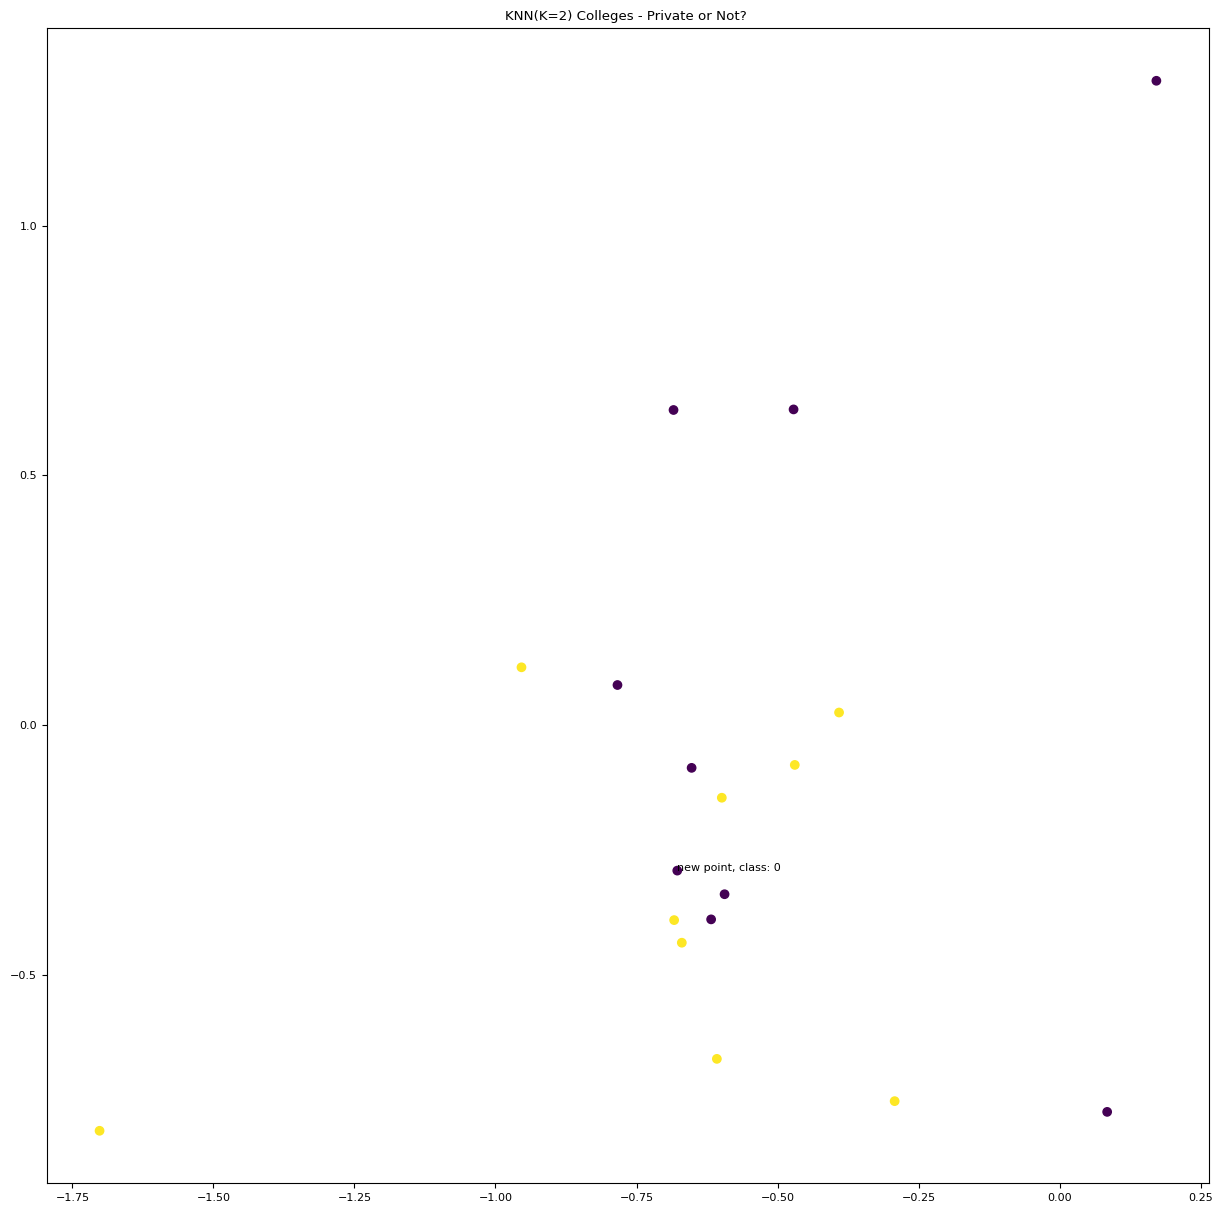

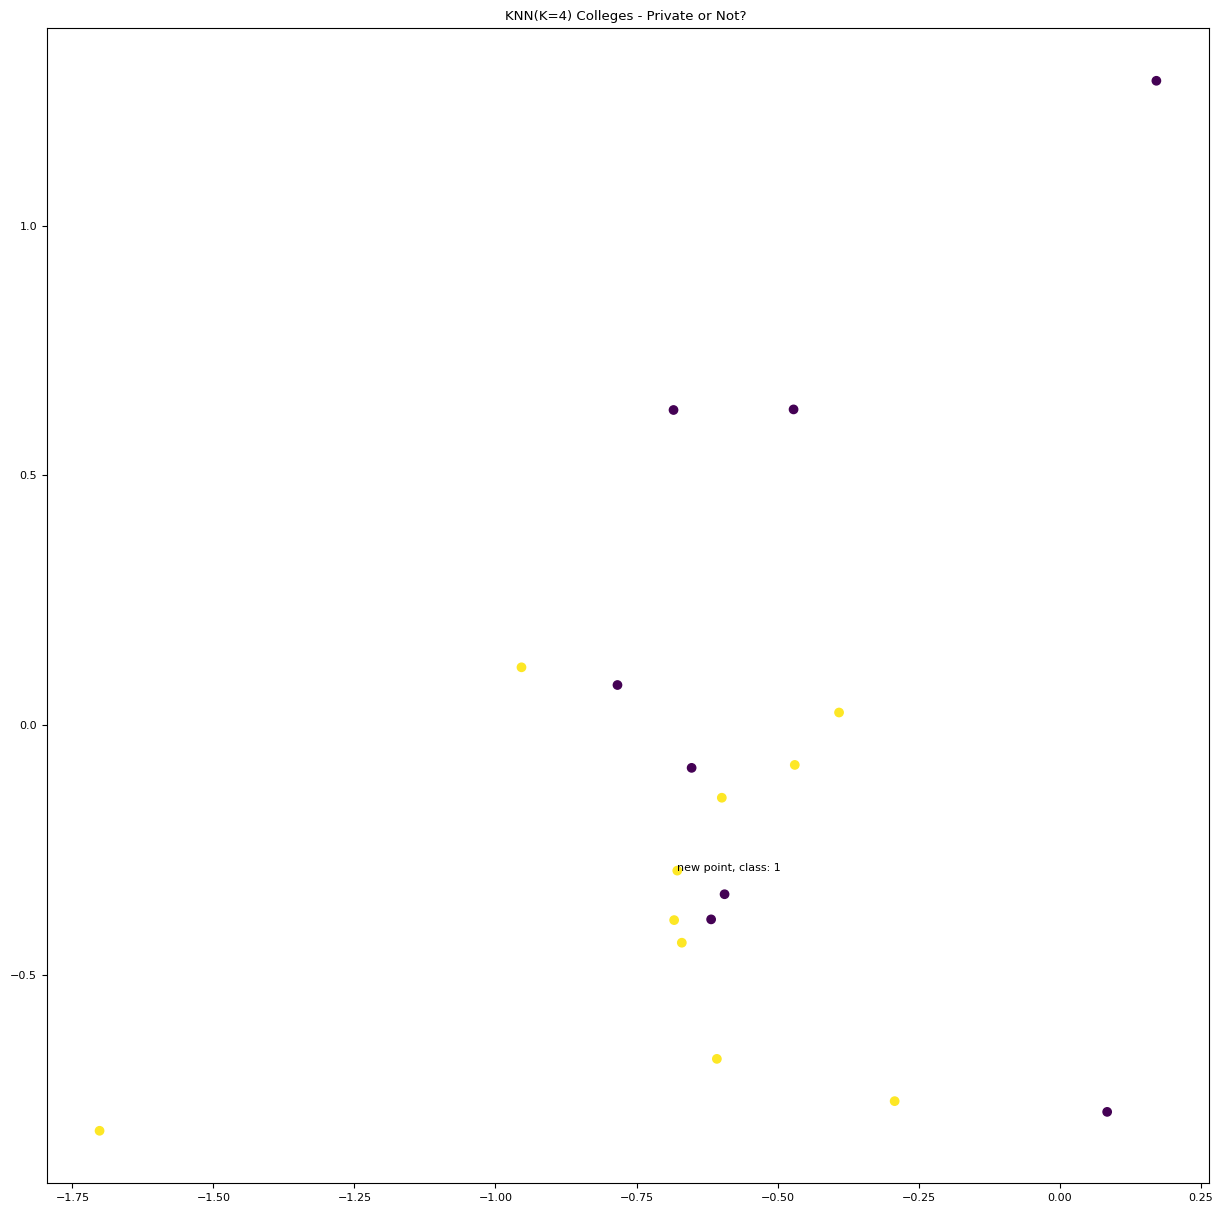

K=2
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.95      0.94      0.94       108

    accuracy                           0.92       156
   macro avg       0.91      0.92      0.91       156
weighted avg       0.92      0.92      0.92       156

K=10
              precision    recall  f1-score   support

           0       0.97      0.75      0.85        48
           1       0.90      0.99      0.94       108

    accuracy                           0.92       156
   macro avg       0.94      0.87      0.89       156
weighted avg       0.92      0.92      0.91       156



c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

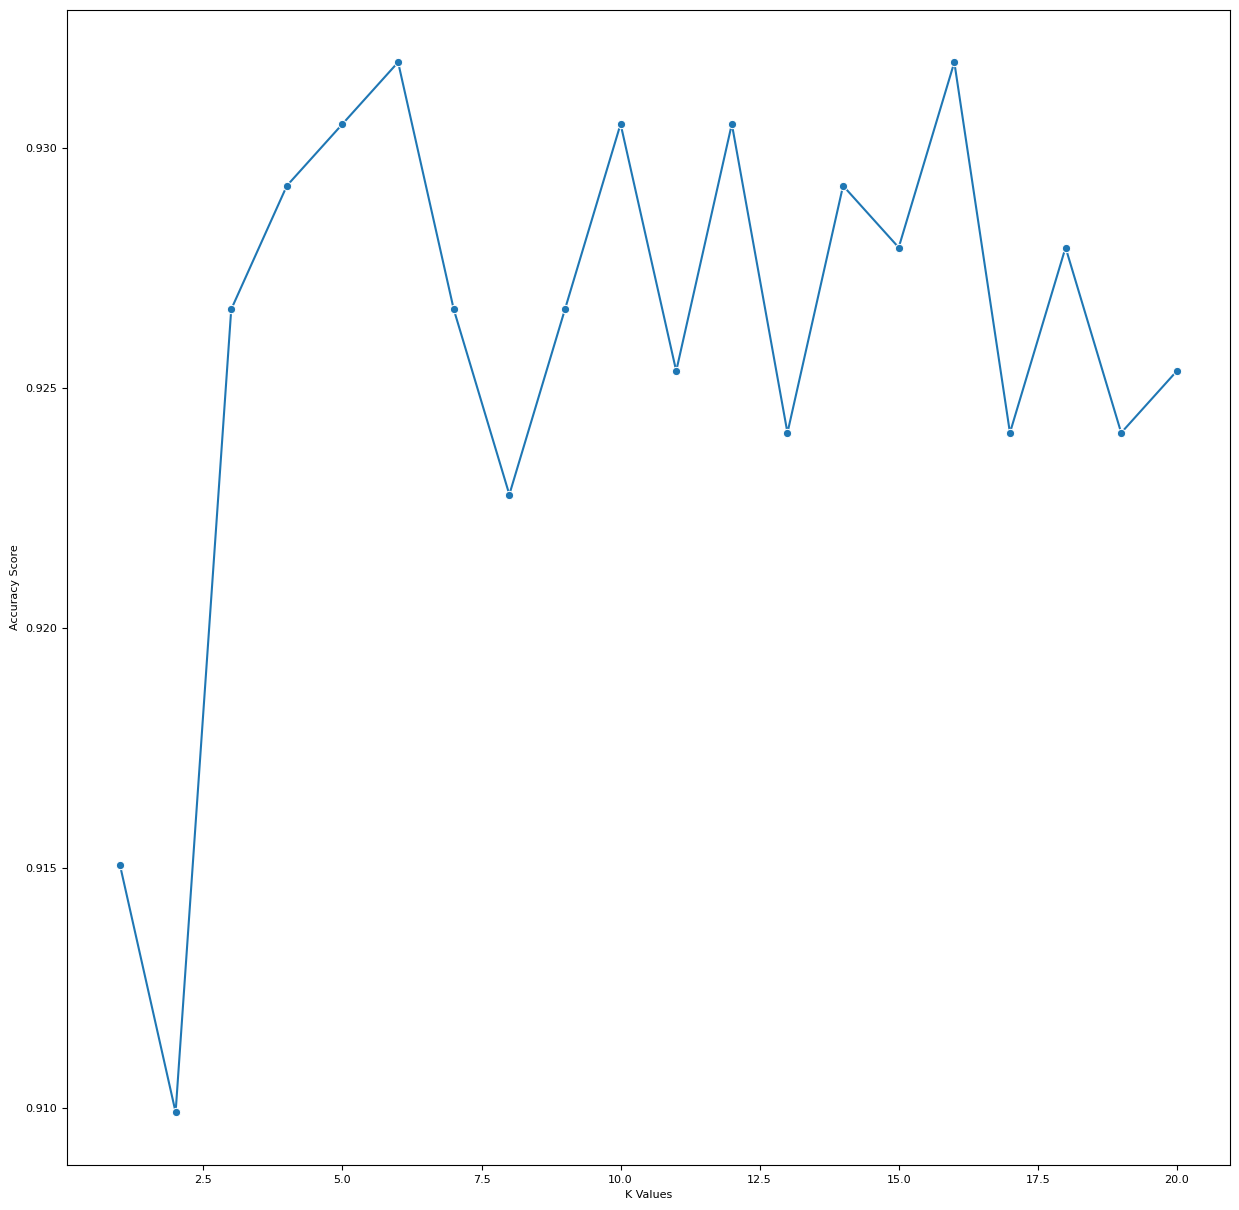

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]
 [1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.51195815e+01]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 

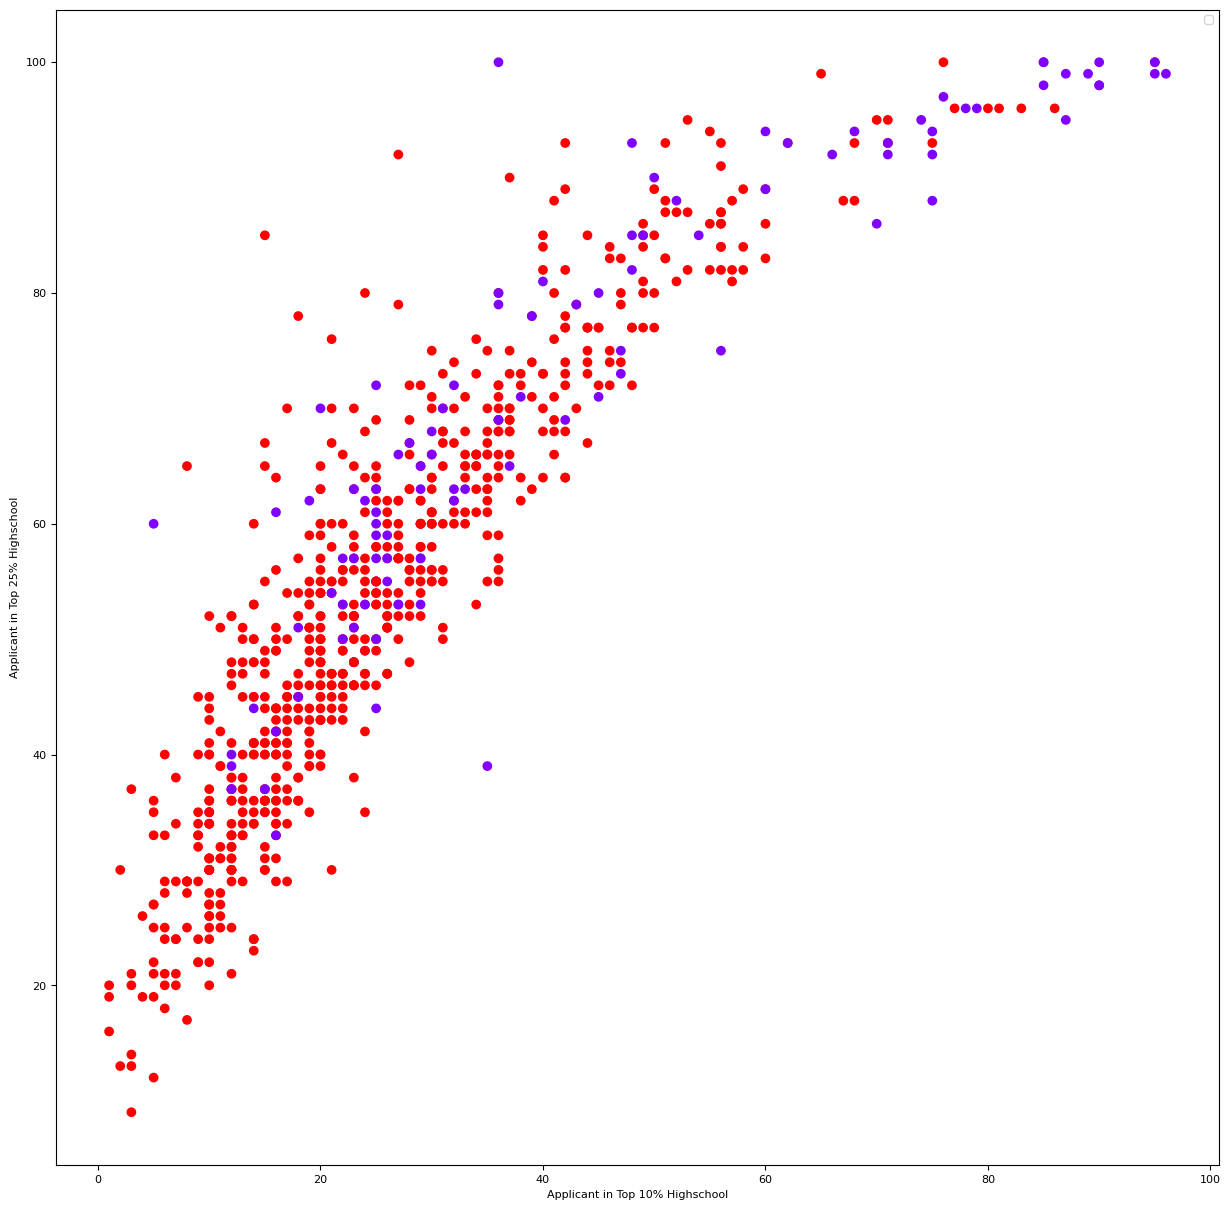

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


K=2
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

[[1.67909382e+03 1.20654158e+03 5.02245203e+02 2.03454158e+01
  4.80191898e+01 2.32546055e+03 7.21164179e+02 8.45028145e+03
  3.95973987e+03 5.31840085e+02 1.36672921e+03 6.56183369e+01
  7.31321962e+01 1.50407249e+01 1.95628998e+01 7.30658422e+03
  6.07633262e+01]
 [1.07111341e+04 7.35846341e+03 2.95760976e+03 3.21585366e+01
  6.37195122e+01 1.55374756e+04 3.11045122e+03 8.28236585e+03
  4.15140244e+03 5.95500000e+02 1.87660976e+03 8.42926829e+01
  8.97560976e+01 1.63512195e+01 1.59512195e+01 9.49881707e+03
  6.08902439e+01]
 [2.32830097e+03 1.58846602e+03 4.92830097e+02 3.74417476e+01
  6.68640777e+01 1.96334951e+03 3.04563107e+02 1.50857718e+04
  5.18160194e

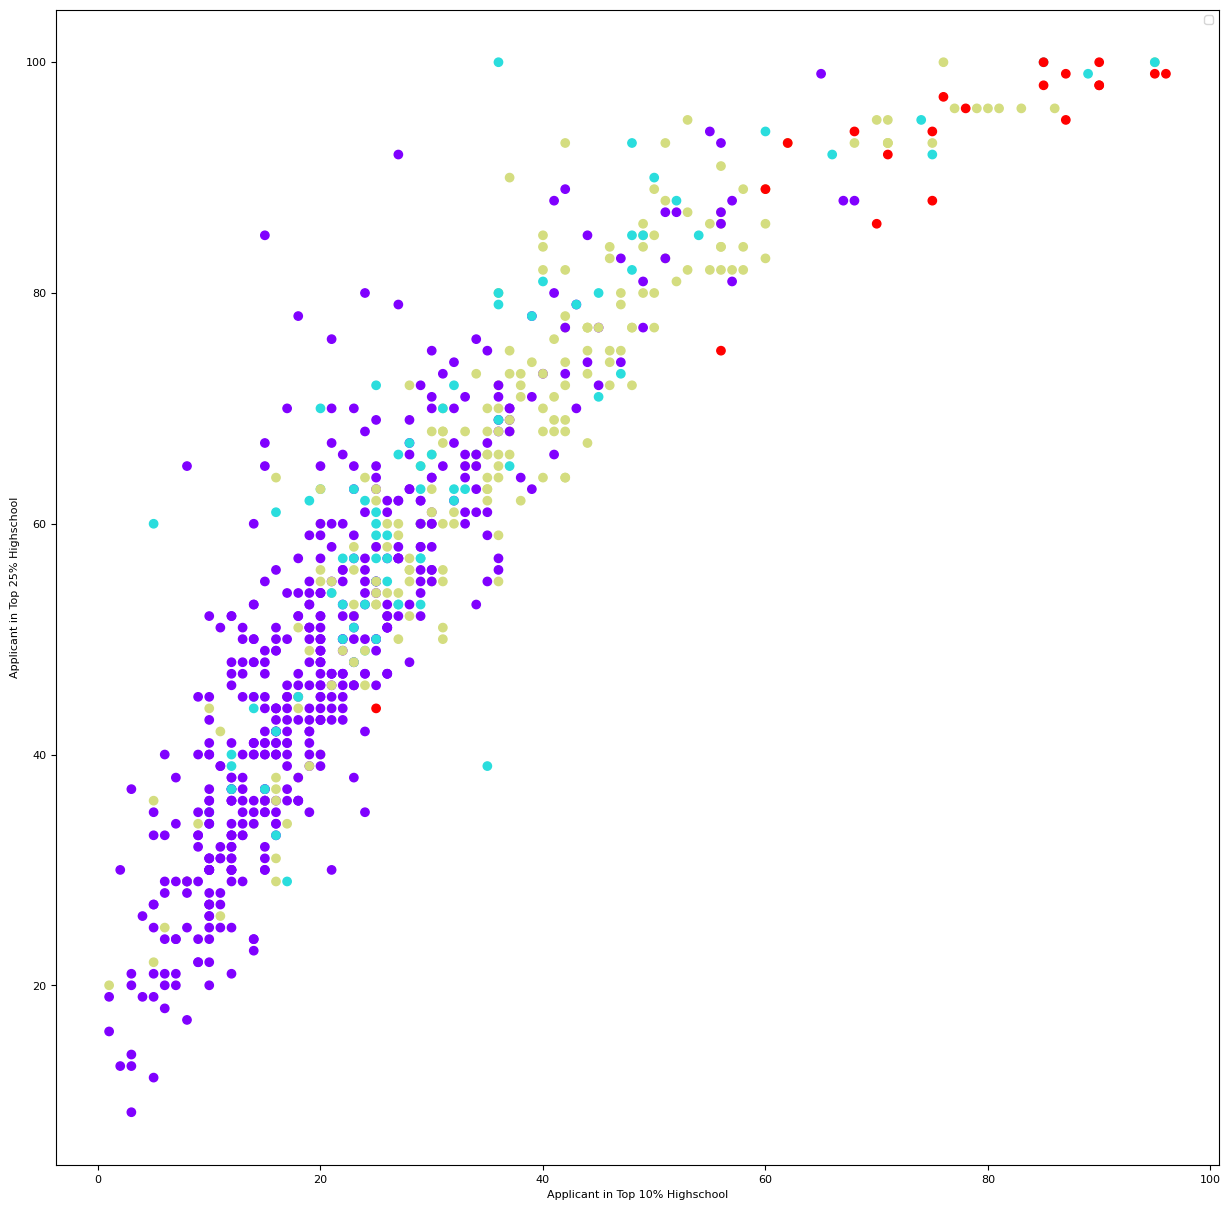

K=4
              precision    recall  f1-score   support

           0       0.29      0.64      0.40       212
           1       0.09      0.01      0.02       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.18       777
   macro avg       0.09      0.16      0.10       777
weighted avg       0.14      0.18      0.12       777



c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Staff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

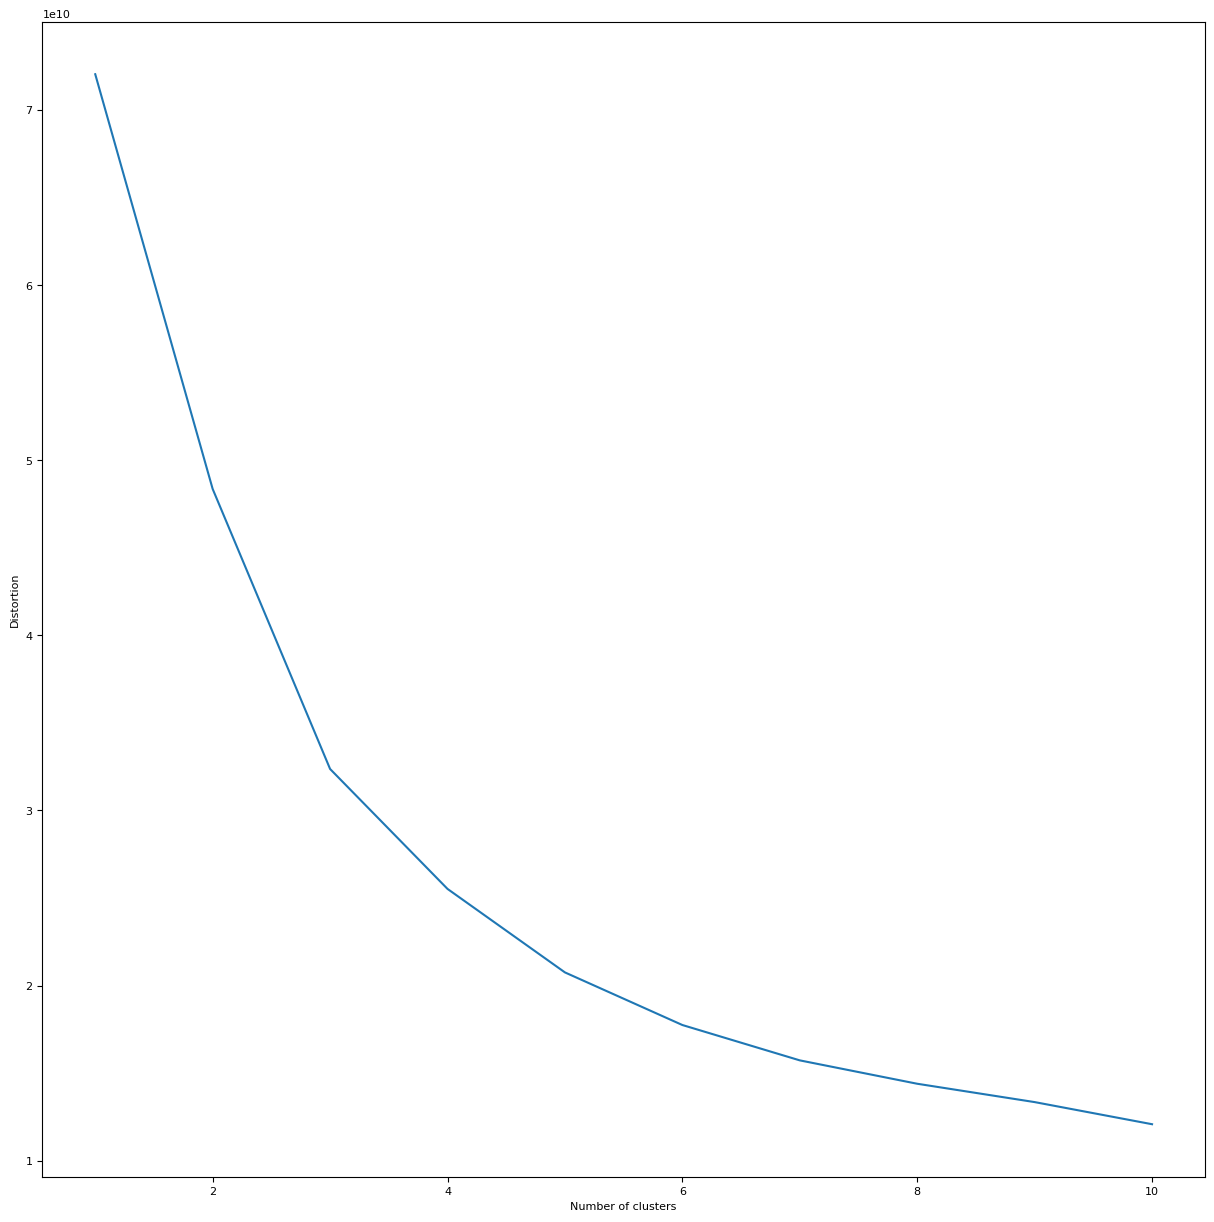

In [2]:
                                        # KNNeighbours Model

#For the purposes of modeling, I will encode the categorical column "Private" into 1's and O's
college_data['Private']=college_data['Private'].astype('category').cat.codes

#Split the data into the feature variables (X) and targe variable (y)
X = college_data.drop('Private', axis=1)
y = college_data['Private']

#Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Scale the features to normalize the range of the independent variables (both test and training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Build and train the model K=2 and K=10 using sample data to depict graphically
#K=2
# I will now take two sample rows (x and y) from the college data set to train, predict and display a scatterplot for N=2
x = [-0.61774837 ,-0.59390829 ,-0.68329739,-0.65232177,-0.78375636,-0.66970196,-0.39095198 ,-0.47159944 ,-0.95392158 ,-0.29239588 ,0.08432276 ,-0.6075599  ,-1.70186039 ,-0.46944355 ,-0.68438947 ,-0.59880171 ,0.17157097]
y = [-0.38953823,-0.33918754,-0.39098304,-0.08607657 ,0.07983991,-0.43628192,0.02477657 ,0.63181185 ,0.11529461,-0.75358987,-0.77509175,-0.66891861,-0.81294224, -0.08019069 ,0.63065477,-0.1459151 ,1.29000516]
groups = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1,0,1,1,1,0,1,0]
college_data_sample = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(college_data_sample, groups) 
#Classifying a new data point
new_x = -0.67773456
new_y = -0.2918798
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
plt.scatter(x + [new_x], y + [new_y], c=groups + [prediction[0]])
plt.text(x=new_x, y=new_y, s=f"new point, class: {prediction[0]}")
plt.title("KNN(K=2) Colleges - Private or Not? ")
plt.show()
#K=10
# I will now take two sample rows (x and y) from the college data set to train, predict and display a scatterplot for N=4
x = [-0.61774837 ,-0.59390829 ,-0.68329739,-0.65232177,-0.78375636,-0.66970196,-0.39095198 ,-0.47159944 ,-0.95392158 ,-0.29239588 ,0.08432276 ,-0.6075599  ,-1.70186039 ,-0.46944355 ,-0.68438947 ,-0.59880171 ,0.17157097]
y = [-0.38953823,-0.33918754,-0.39098304,-0.08607657 ,0.07983991,-0.43628192,0.02477657 ,0.63181185 ,0.11529461,-0.75358987,-0.77509175,-0.66891861,-0.81294224, -0.08019069 ,0.63065477,-0.1459151 ,1.29000516]
groups = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1,0,1,1,1,0,1,0]
college_data_sample = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(college_data_sample, groups) 
#Classifying a new data point
new_x = -0.67773456
new_y = -0.2918798
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
plt.scatter(x + [new_x], y + [new_y], c=groups + [prediction[0]])
plt.text(x=new_x, y=new_y, s=f"new point, class: {prediction[0]}")
plt.title("KNN(K=4) Colleges - Private or Not? ")
plt.show()


#Display metrics of models at K=2 and K=10 respectively
#K=2
print("K=2")
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
#After training the model, I will predict what class it belongs to 0 or 1
y_pred = knn.predict(X_test)
#Display the metrics 
print(classification_report(y_test,y_pred))
#K=10
print("K=10")
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
#After training the model, I will predict what class it belongs to 0 or 1
y_pred = knn.predict(X_test)
#Display the metrics 
print(classification_report(y_test,y_pred))

#using Cross-Validaton to retrieve the best value of K and grahing the results
#looping through 20 values of k

#Split the data into the feature variables (X) and targe variable (y)
X_cv = college_data.drop('Private', axis=1)
y_cv = college_data['Private']
k_values = [i for i in range (1,21)]
scores = []
scaler = StandardScaler()
X_cv = scaler.fit_transform(X_cv)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_cv, y_cv, cv=7)
    scores.append(np.mean(score))
sea.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title = "K Value Accuracy Score"
plt.show()



                                                              #K Means Clustering Model


 #K Means Clustering Model
#I will first create a model with two clusters (Public College and Private College) with K=2
kmeans = KMeans(2)
# fit all the features (drop the response variable ---- i.e. 'Private')
kmeans.fit(college_data.drop('Private',axis=1))
#Display all cluster centers
print(kmeans.cluster_centers_)
#Display k-means labels
print(kmeans.labels_)
#using this k-means lets plot the classification of the following features in the data set: Applicants Accepted vs Applicants Enrolled and Room and board Cost vs Book Cost
#Accepted vs Enrolled
plt.scatter(college_data['Applicants_Top10percent_Highschool'],college_data['Applicants_Top25percent_Highschool'], c=kmeans.labels_,cmap='rainbow')
plt.xlabel("Applicant in Top 10% Highschool")
plt.ylabel("Applicant in Top 25% Highschool")
plt.legend()
plt.show()
print("K=2")
#I will now evaluate how the model worked
print(classification_report(college_data['Private'], kmeans.labels_))

#I will first create a model with two clusters (Public College and Private College) with K=4
kmeans = KMeans(4)
# fit all the features (drop the response variable ---- i.e. 'Private')
kmeans.fit(college_data.drop('Private',axis=1))
#Display all cluster centers
print(kmeans.cluster_centers_)
#Display k-means labels
print(kmeans.labels_)
#using this k-means lets plot the classification of the following features in the data set: Applicants Accepted vs Applicants Enrolled and Room and board Cost vs Book Cost
#Accepted vs Enrolled
plt.scatter(college_data['Applicants_Top10percent_Highschool'],college_data['Applicants_Top25percent_Highschool'], c=kmeans.labels_,cmap='rainbow')
plt.xlabel("Applicant in Top 10% Highschool")
plt.ylabel("Applicant in Top 25% Highschool")
plt.legend()
plt.show()
print("K=4")
#I will now evaluate how the model worked
print(classification_report(college_data['Private'], kmeans.labels_))

dist = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(college_data.drop('Private',axis=1))
    dist.append(kmeans.inertia_)
plt.plot(range(1, 11), dist)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


 **Essay:**


<u>KNN and K Means Cluster Comparison</u>

 KNN:<br> 
 KNN (k-Nearest Neighbors) that is an algorithm which can be used in any situation involving multiple classes. This alogrithm predicts the output for some new input by locating the K closest data points in a particular data set to the new data point and applying their labels. In my case study, the label would be private or public college. The algorithm will count the eucledian distance of the new data point to its nearest neighbors. Because the algorithm is realatively simple to implement and can easly handle data which is incomplete or has some sort of non-linear patterns associated with it. However, for large data sets the KNN algorithm is computationally heavy because of the fact that distances need to be calculated between every point. K-means clustering is used to combine 

 Kmeans Clustering:<br> 
 Kmeans clustering is an unsupervised learning approach which is used to combine related data points into k groups depending on the similarity of the features. The first step in the algorithm is to create k cluster centers somewhere in the data point space. The algorithm will then calculate the distance to each cluster center and assign a new incoming data point to the closest cluster. This alogrithm is then performed iteratively until the data points converge or when there is no longer clustering of data points. The number of clusters or k is hard to determine and often involves a level or expertise/experience. One issue with this alogrithm is it is tied to the cluster centers and thus an assumption is made that all data points have relatively similiar size. 

 KNN vs Kmeans Clustering Similarities:<br> 
 Some similiarites between both algorithms is that they both involve computing distances and assigning data points to a set of points they are nearest to.Both algorithms are iterative which means they are done repetitively for a certain number of steps. 

  KNN vs Kmeans Clustering Differences:<br> 
  The two algorithms differ in the fact that to train KNN, you need a dataset with labeled data points. However, in Kmeans clustering the model does not require any information. The uses of the algorithms are also different. We utilize the KNN algorithm to predict a class label of some new data point. On the contrary the Kmeans algorithm is used to find patterns in a particular data set by grouping these points into clusters. Another key difference is that in the KNN algorithm we need to choose the number of nearest inputs as input where as the Kmeans algorithm requires the number of clusters as its input.
 

 I would now like to evaluate the performance of both models used in this analysis. The metrics I will use to evaluate the performance are: accuracy, precision, recall and f1-score. Accuracy refers to how many times a model made correct predictions throughout the whole data set. Precision refers to the correctiness of positive predictions. To relate to our use case, percision would be all correctly identified: "students picking public college/Total number of students identified as picking public college". Recall refers to capturing all of the relevant instances. Relating to my use case it would be: "Students correctly identified as choosing public colleges/Students which acutally chose public colleges" The F1 score just combines the precision and recall scores of a particular model. In all metrics, the higher the number the better.


 <u>KNN model evaluation at K=2 and K=10</u>

 Looking at all the metrics discussed above, the models are pretty even. Some small differences are that the F1-score for the K=2 model is: 0.95 but for the K=10 model it is: 0.96. Also the recalls for 0 and 1 are slightly different for both Ks. Again very minor differences.

 <u>Kmeans Clustering model evaluation at K=2 and K=4</u>

For the K-means clustering there is a significant difference between the performance of the models at K=2 and K=4 clusters. The K=4 clusters performed much better. In terms of accuracy the K=2 model is: 78% accurate, whereas the K=4 model is 18% percent accurate. For all other metrics there was also an advantage to the K=2 models. However, the recall for 0 was higher at K=4 at 64% than at K=2 which  is 35% This however only means that the model returns most relevant results. So the question is how to find the optimal K? We can utilize the elbow method, as I did in my analysis. The elbow point would be the optimal number of clusters, which in my example would be between 2 and 3 cluster.


**Conclusion:**

I believe that my analysis would be very useful to colleges and perspective students. From the point of view of colleges, they will get a better sense of which students have a higher chance of applying to their institution whether private or public. The applicant statistics visualizations - grouped bar chart and pie chart allows colleges to see what students actually enrolled after being accepted and those percentages accross the board. This will help them better create their marketing campaign and target those types of students who actually enrolled. The regression plot of Graduation Rate to Student-to- Facutly ratio will also help Colleges to evaluate the optimal staffing needed to raise graduation rates and entice more perspective students to join thier school. From the point of perspective college applicants, the histogram of personal spending and room and board costs will be important metrics in comparing private vs public and having a better sense in which one they can afford ----- financially speaking. In conclusion, we can see how this analysis not only adds value to the organization (the college) but also to the perspective college applicant in the process of deciding the type of college which fits them best, be it public or private.